In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "D:/guvi_projects/powerpulse/household_power_consumption.txt"
data = pd.read_csv(file_path, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)
     

In [3]:
data1=data

In [4]:
data1.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [6]:
data1.shape

(2075259, 8)

In [7]:
data1.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
missing_data = data1[data1.isnull().any(axis=1)]
print(missing_data)

                   datetime  Global_active_power  Global_reactive_power  \
6839    2006-12-21 11:23:00                  NaN                    NaN   
6840    2006-12-21 11:24:00                  NaN                    NaN   
19724   2006-12-30 10:08:00                  NaN                    NaN   
19725   2006-12-30 10:09:00                  NaN                    NaN   
41832   2007-01-14 18:36:00                  NaN                    NaN   
...                     ...                  ...                    ...   
1990185 2010-09-28 19:09:00                  NaN                    NaN   
1990186 2010-09-28 19:10:00                  NaN                    NaN   
1990187 2010-09-28 19:11:00                  NaN                    NaN   
1990188 2010-09-28 19:12:00                  NaN                    NaN   
2027411 2010-10-24 15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839         NaN             

In [9]:
# Forward fill for continuous time-series gaps
data1.fillna(method='ffill', inplace=True)
     

In [10]:
data1.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
data1.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-06 07:12:59.999994112,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00


In [12]:
df= data1

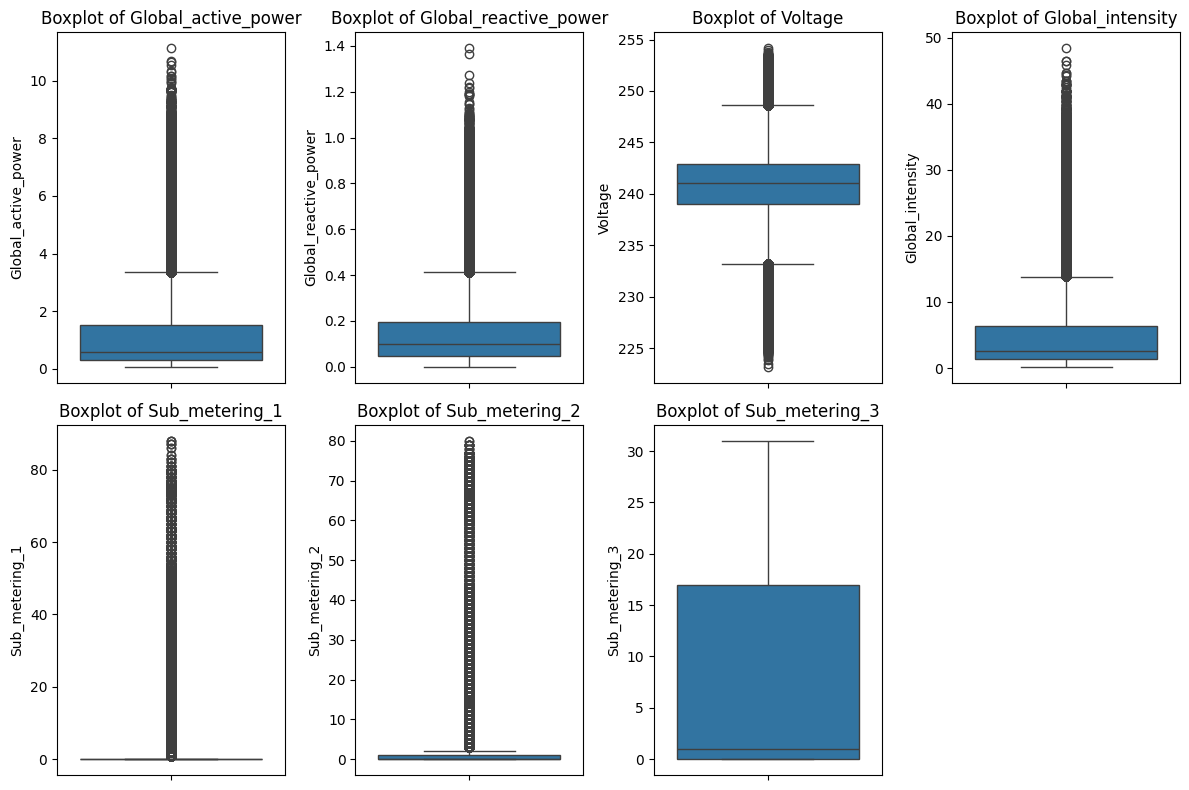

In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns
# Boxplot for each numerical feature
plt.figure(figsize=(12,8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

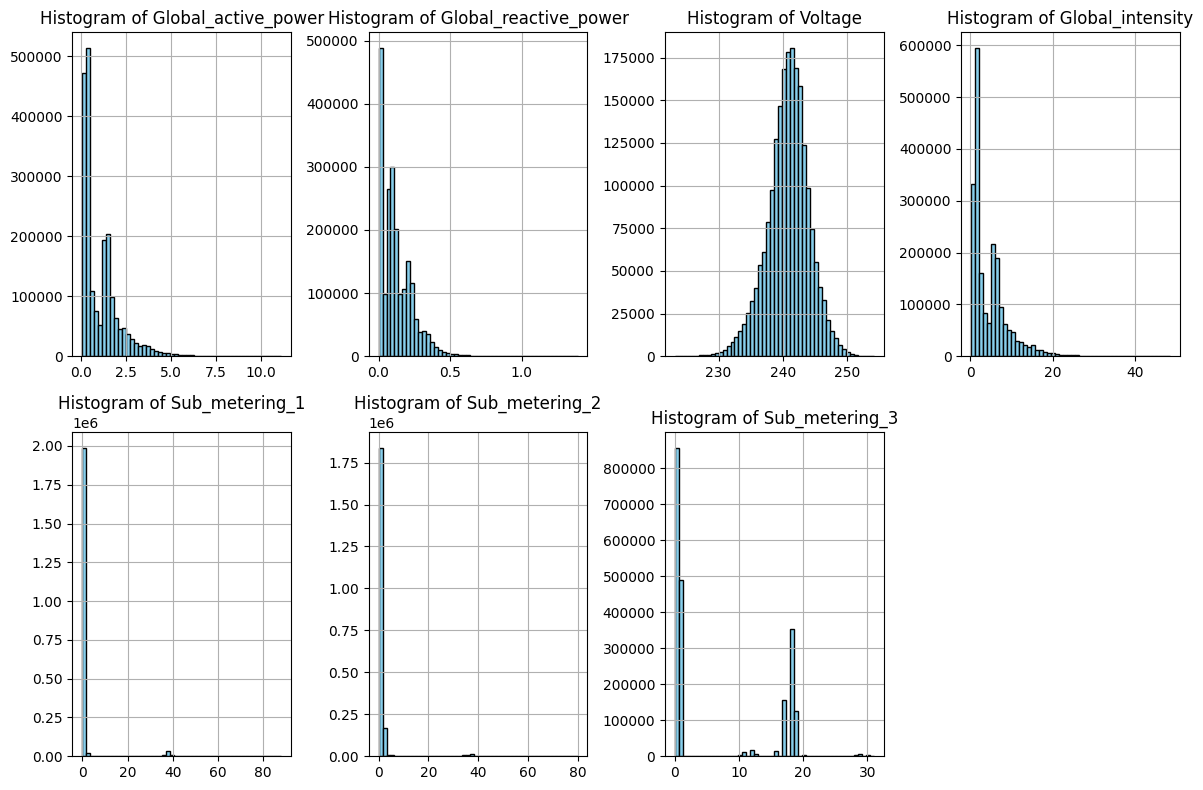

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable
    data[column].hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [15]:
df.select_dtypes(include=['number']).skew()

Global_active_power      1.797454
Global_reactive_power    1.265232
Voltage                 -0.323726
Global_intensity         1.860937
Sub_metering_1           5.983578
Sub_metering_2           7.135711
Sub_metering_3           0.736887
dtype: float64

In [16]:
print("\nUnique Values in Sub_metering_1:", df['Sub_metering_1'].nunique())
print("\nValue Counts:")
print(df['Sub_metering_1'].value_counts().head(10))


Unique Values in Sub_metering_1: 88

Value Counts:
Sub_metering_1
0.0     1903013
1.0       84939
2.0       22150
38.0      16121
37.0      14893
39.0       6504
36.0       5270
35.0       1359
40.0       1159
32.0        802
Name: count, dtype: int64


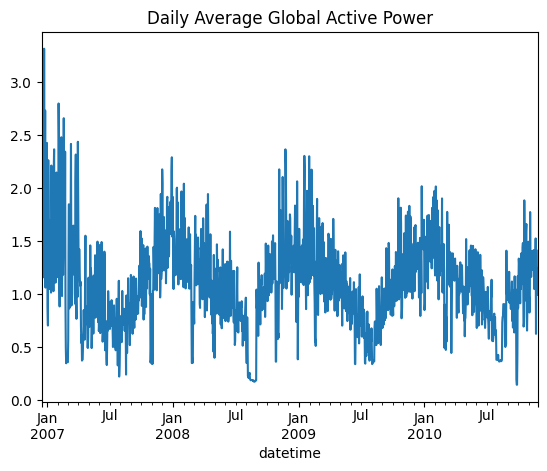

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.resample('D')['Global_active_power'].mean().plot()
plt.title("Daily Average Global Active Power")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [19]:
df = df.reset_index()

In [20]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday
df["weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)

In [21]:
df["daily_avg_power"] = df.groupby(df["datetime"].dt.date)["Global_active_power"].transform("mean")
df["peak_hour"] = df["hour"].apply(lambda x: 1 if 17 <= x <= 21 else 0)
df["rolling_avg_power"] = df["Global_active_power"].rolling(window=60, min_periods=1).mean()


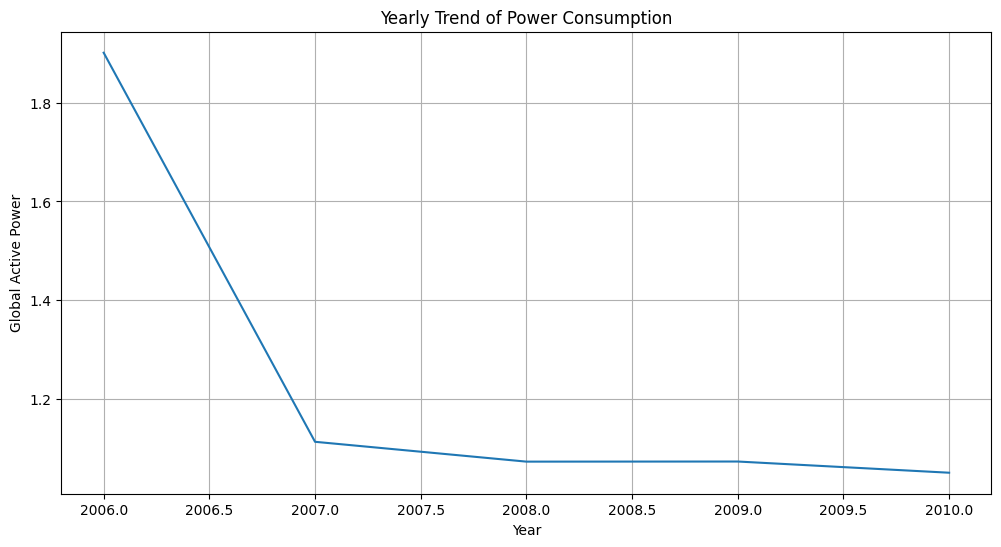

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='Global_active_power', estimator='mean', ci=None)
plt.title("Yearly Trend of Power Consumption")
plt.xlabel("Year")
plt.ylabel("Global Active Power")
plt.grid()
plt.show()

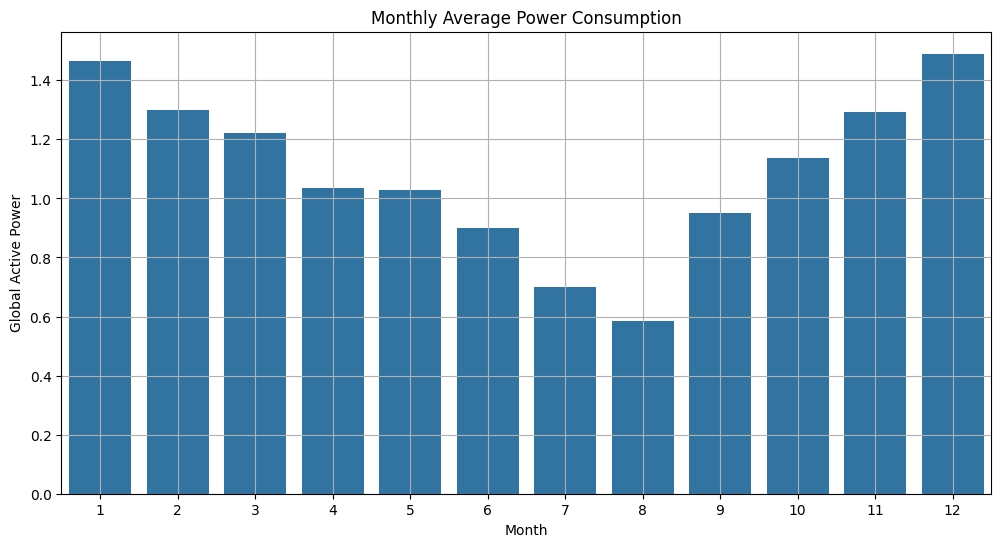

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='Global_active_power', estimator='mean', ci=None)
plt.title("Monthly Average Power Consumption")
plt.xlabel("Month")
plt.ylabel("Global Active Power")
plt.grid()
plt.show()

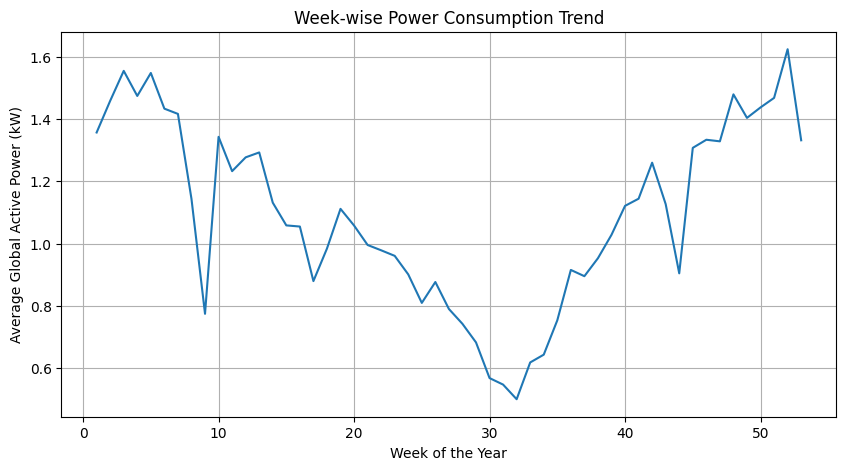

In [24]:
weekly_trend = df.groupby(df["datetime"].dt.isocalendar().week)["Global_active_power"].mean()
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind="line", title="Week-wise Power Consumption Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

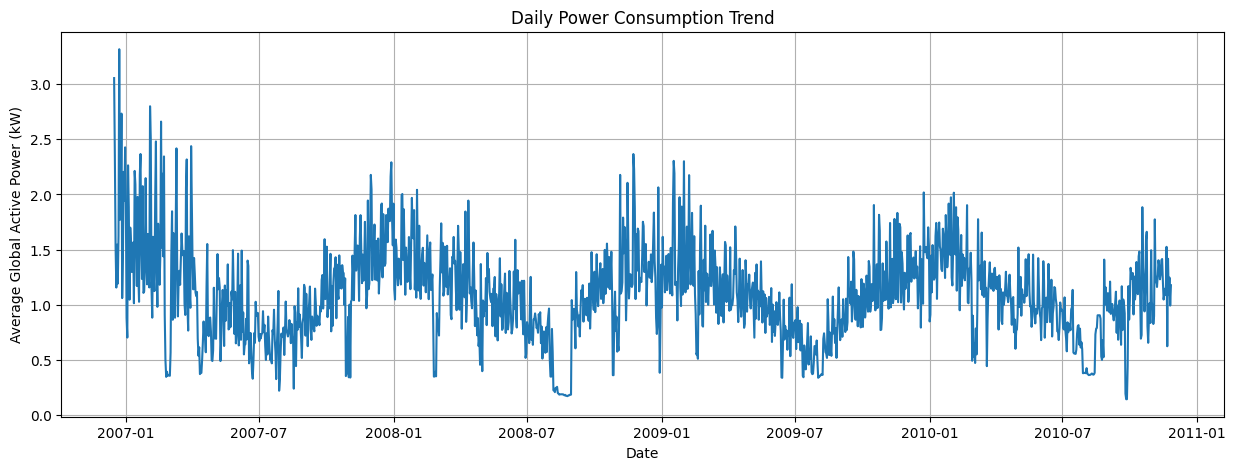

In [25]:
daily_trend = df.groupby(df["datetime"].dt.date)["Global_active_power"].mean()
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

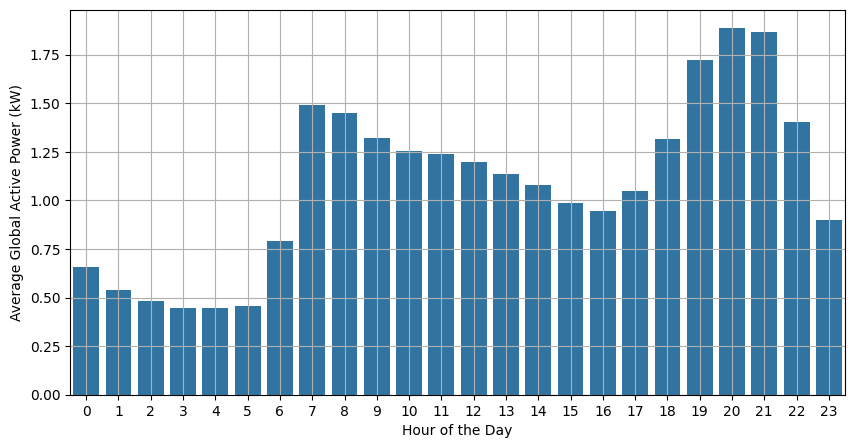

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='hour', y='Global_active_power', estimator='mean', ci=None)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

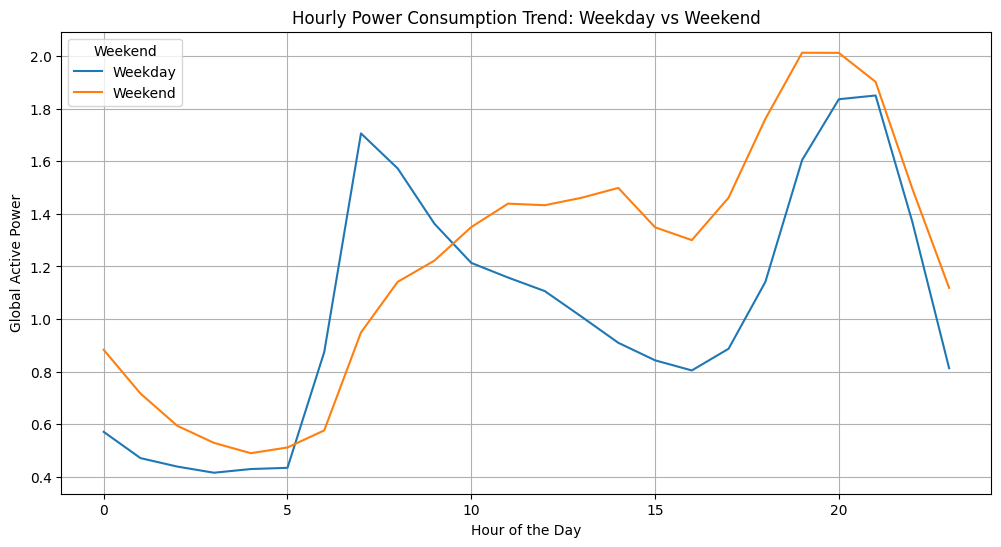

In [27]:
# Compare weekday vs weekend power consumption with line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='Global_active_power', hue='weekend', estimator='mean', ci=None)
plt.title("Hourly Power Consumption Trend: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Global Active Power")
plt.legend(title="Weekend", labels=["Weekday", "Weekend"])
plt.grid()
plt.show()

In [28]:
df.drop(columns=["datetime"], inplace=True)

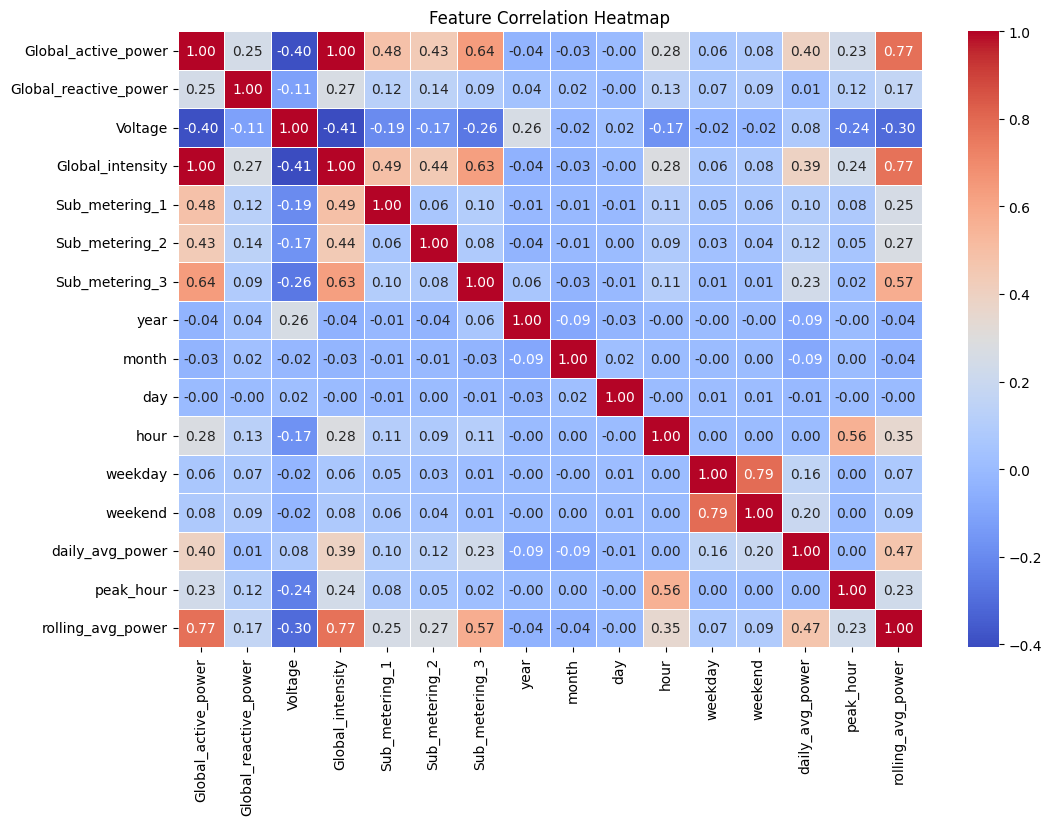

In [29]:
# Correlation heatmap to identify key influencing factors
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
x = df[["Global_intensity",'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' ,'Voltage']]
y = df["Global_active_power"]

In [31]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [32]:
# Normalize features for neural networks only
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=30),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=30),
    "NeuralNetwork": MLPRegressor(random_state=30, max_iter=200)
}

In [34]:
# Train models before hyperparameter tuning
trained_models = {}
for name, model in models.items():
    if name == "NeuralNetwork":
        model.fit(x_train_scaled, y_train)
    else:
        model.fit(x_train, y_train)
    trained_models[name] = model

In [35]:
# Evaluate models before hyperparameter tuning
def evaluate_model(model, x_test, y_test, scaled=False):
    if scaled:
        y_pred = model.predict(x_test_scaled)
    else:
        y_pred = model.predict(x_test)
    return {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R-squared": r2_score(y_test, y_pred)
    }

In [36]:
evaluations_before_tuning = {name: evaluate_model(model, x_test, y_test, scaled=(name == "NeuralNetwork")) for name, model in trained_models.items()}
print("Evaluation Before Hyperparameter Tuning:", evaluations_before_tuning)

Evaluation Before Hyperparameter Tuning: {'LinearRegression': {'RMSE': np.float64(0.04437685326422858), 'MAE': 0.02953956226320028, 'R-squared': 0.9982189710188152}, 'RandomForestRegressor': {'RMSE': np.float64(0.03867669163093655), 'MAE': 0.023510461276933577, 'R-squared': 0.9986471282901616}, 'GradientBoostingRegressor': {'RMSE': np.float64(0.037172312786398674), 'MAE': 0.024106097390248542, 'R-squared': 0.9987503248171723}, 'NeuralNetwork': {'RMSE': np.float64(0.035468260982032505), 'MAE': 0.022881228557203048, 'R-squared': 0.9988622737708825}}


In [37]:
print("Evaluation Before Hyperparameter Tuning:")
for model_name, metrics in evaluations_before_tuning.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Evaluation Before Hyperparameter Tuning:

Model: LinearRegression
  RMSE: 0.0444
  MAE: 0.0295
  R-squared: 0.9982

Model: RandomForestRegressor
  RMSE: 0.0387
  MAE: 0.0235
  R-squared: 0.9986

Model: GradientBoostingRegressor
  RMSE: 0.0372
  MAE: 0.0241
  R-squared: 0.9988

Model: NeuralNetwork
  RMSE: 0.0355
  MAE: 0.0229
  R-squared: 0.9989


In [38]:
# Hyperparameter tuning (RandomizedSearchCV for efficiency)
param_grids = {
    "RandomForestRegressor": {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    "GradientBoostingRegressor": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    "NeuralNetwork": {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu'], 'alpha': [0.0001]},
}

In [39]:
tuned_models = {}
for name, model in trained_models.items():
    if name in param_grids:
        search = RandomizedSearchCV(model, param_grids[name], cv=2, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=5)
        if name == "NeuralNetwork":
            search.fit(x_train_scaled, y_train)
        else:
            search.fit(x_train, y_train)
        tuned_models[name] = search.best_estimator_
    else:
        tuned_models[name] = model

In [40]:
# Evaluate models after hyperparameter tuning
evaluations_after_tuning = {name: evaluate_model(model, x_test, y_test, scaled=(name == "NeuralNetwork")) for name, model in tuned_models.items()}
print("Evaluation After Hyperparameter Tuning:", evaluations_after_tuning)


Evaluation After Hyperparameter Tuning: {'LinearRegression': {'RMSE': np.float64(0.04437685326422858), 'MAE': 0.02953956226320028, 'R-squared': 0.9982189710188152}, 'RandomForestRegressor': {'RMSE': np.float64(0.03730187743525701), 'MAE': 0.02328772717381569, 'R-squared': 0.9987415981122437}, 'GradientBoostingRegressor': {'RMSE': np.float64(0.037172312786398674), 'MAE': 0.024106097390248542, 'R-squared': 0.9987503248171723}, 'NeuralNetwork': {'RMSE': np.float64(0.035468260982032505), 'MAE': 0.022881228557203048, 'R-squared': 0.9988622737708825}}


In [41]:
print("Evaluation After Hyperparameter Tuning:")
for name, metrics in evaluations_after_tuning.items():
    print(f"\nModel: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Evaluation After Hyperparameter Tuning:

Model: LinearRegression
RMSE: 0.0444
MAE: 0.0295
R-squared: 0.9982

Model: RandomForestRegressor
RMSE: 0.0373
MAE: 0.0233
R-squared: 0.9987

Model: GradientBoostingRegressor
RMSE: 0.0372
MAE: 0.0241
R-squared: 0.9988

Model: NeuralNetwork
RMSE: 0.0355
MAE: 0.0229
R-squared: 0.9989


In [42]:
# Identify the best model based on highest R-squared
best_model_name = max(evaluations_after_tuning, key=lambda k: evaluations_after_tuning[k]["R-squared"])
best_model_metrics = evaluations_after_tuning[best_model_name]

# Display the best model
print("\nBest Model:")
print(f"Model: {best_model_name}")
for metric, value in best_model_metrics.items():
    print(f"  {metric}: {value:.4f}")


Best Model:
Model: NeuralNetwork
  RMSE: 0.0355
  MAE: 0.0229
  R-squared: 0.9989


In [43]:
# Visualization of predictive performance
predictions = {name: model.predict(x_test_scaled if name == "NeuralNetwork" else x_test) for name, model in tuned_models.items()}
     

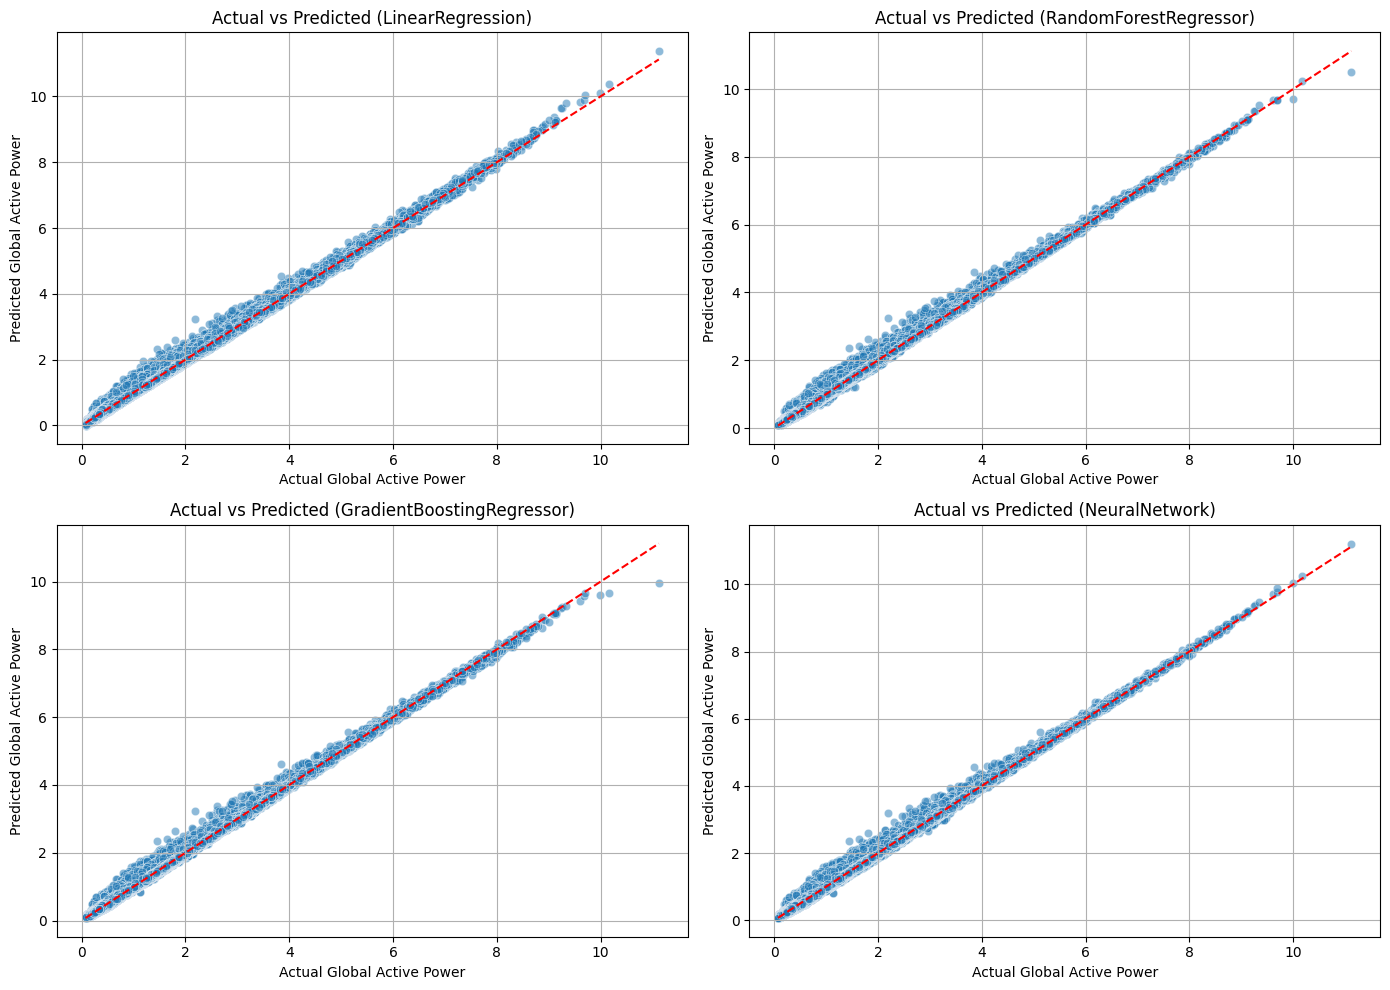

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for (model_name, y_pred), ax in zip(predictions.items(), axes):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    ax.set_title(f"Actual vs Predicted ({model_name})")
    ax.set_xlabel("Actual Global Active Power")
    ax.set_ylabel("Predicted Global Active Power")
    ax.grid()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()